In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

plt.style.use("seaborn-v0_8")
random_state = 42

In [10]:
df = pd.read_csv("datasets/iris.data.txt")
df_X = df.iloc[:, [0, 2]]
encoder = LabelEncoder()
df_y = encoder.fit_transform(df["Class"])

# Check covariance values
display(pd.DataFrame(np.cov(df_X, rowvar=False), columns=df_X.columns, index=df_X.columns))

X_train, X_test, y_train, y_test = train_test_split(df_X.values, df_y, test_size=0.33, random_state=random_state)

,Sepal Length,Petal Length
Sepal Length,0.685694,1.273682
Petal Length,1.273682,3.113179


---
# Bayesian Learning Classifier
https://www.datarobot.com/blog/bayesian-machine-learning/
- Given:
    - the training set $D = \{ (X_1, y_1), (X_2, y_2), ..., (X_n, y_n) \}$
    - where each $X_i$ is a vector of $p$ variables: $X_i = \{x_{i,1}, x_{i,2}, ..., x_{i,p}\}$
    - $y_i$ is a qualitative response (a class for example): $y_i \in H = \{h_1, h_2, ..., h_m\}$
- We can think of a prediction/classification problem as the problem of determining the most probable hypothesis (prediction/class) $h^*$ from the space $H$, of a new sample $X_t$ from the test set
- Bayes Theorem:
    - $$P(\text{model} | \text{observed data}) = \frac{P(\text{observed data} | \text{model})\cdot P_0(\text{model})}{\text{normalization}}$$
    - $$ P(h_i | X_t) = \frac{P(X_t | h_i) \cdot P(h_i)}{P(X_t)}$$
        - $P(h_i | X_t) = P(\text{model} | \text{observed data})$ is the *posterior probability*: prob of hypothesis $h_i$ given the observation $X_t$
        - $P(X_t | h_i) = P(\text{observed data} | \text{model})$ is the *likelihood* of observing $X_t$ under the hypothesis $h_i$
        - $P(h_i) = P_0(\text{model})$ is the *prior probability* of the hypothesis $h_i$
- The likelihood can be estimated from the training data. When training a regular machine learning model, we're performing **Maximum Likelihood Estimation**: we look only to the likelihoods (probability of the observations that fall under a hypothesis), assuming that every hypothesis is equally probable a priori (same $P(h_i)$): $$ h^*= \argmax_{h_i \in H}P(X_t|h_i) = \argmax_{h_i \in H} P(x_{t,1}, ..., x_{t,p}|h_i) $$
that is: what is the class $h_i$ for which $X_t$ has the highest probability to belong to that class?
- The Bayesian Classifier uses the **Maximum a Posteriori (MAP)**: it takes into consideration the likelihood of observation under a hypothesis, and the priori probability of that hypothesis (using Bayes Theorem): $$ h^*= \argmax_{h_i \in H}P(h_i|X_t)=...=\argmax_{h_i \in H}P(X_t|h_i)P(h_i) = \argmax_{h_i \in H} P(x_{t,1}, ..., x_{t,p}|h_i) P(h_i)$$

---
## Naive (Simple) Bayes
- It's a form of Bayesian Classifier that uses MAP estimator and *assumes the variables are mutually independent*, to be computationally more efficient: $$ h^*= \argmax_{h_i \in H} P(h_i) \prod_{j \in p} P(x_{t,j}|h_i)$$
    - The prior probability $P(h_i)$ is the number of instances of class $h_i$, divided by total number of train samples: $$ P(h_i) = \frac{\# \text{instances of class } h_i}{D}$$
    - The likelihood $P(x_{t,j}|h_i)$ is the number of instances of class $h_i$ with value equal to $x_j$, divided by the number of instances of class $h_i$: $$ P(x_{t,j} | h_i) = \frac{\# \text{instances of class } h_i \text{ with } x_{*,j} \in D = x_{t,j}}{\# \text{instances of class } h_i} $$
- Despite its simplicity:
    - It can work extremely well on several use cases, even where the independence of the variables cannot be assumed (e.g. text classification)
    - It represents the foundation upon which more sophisticated Bayesian classification techniques can be devised (e.g. Bayesian networks)
- Problems
    1) If one of the values ($x_j$) of the test sample never appears in the dataset, its likelihood is zero and all the equation is zero
        - *Laplace smoothing*: 
        $$ P(x_{t,j} | h_i) = \frac{(\# \text{instances of class } h_i \text{ with } x_{*,j} \in D = x_{t,j}) + \alpha}{(\# \text{instances of class } h_i) + \alpha  (\# \text{distinct values of class }h_i)}$$
        With $\alpha = 0$ we obtain the original unsmoothed formula. As $\alpha$ increases, the likelihood probability moves towards uniform distribution (0.5). Most of the time, $\alpha = 1$ is being used to remove the problem of zero probability.
    2) MAP equation is a product of small quantities between 0 and 1. The risk is to come too close to 0. 
        - The solution is to calculate the logarithm of the productory, because it becomes a sum of logarithms
    3) **Continuous variables**
        - Discretize into bins: associate one ordinal attribute to each bin
        - OR assume that the variable follows a specific distribution ("event model"): estimate the parameters of the distribution from training set *and use it as likelihood probability* (for example ***Gaussian Naive Bayes***)

- Scikit-learn provides four versions of NB methods:
    - ***GaussianNB***. The likelihood of the variables is assumed to be Gaussian.
    - ***MultinomialNB***. (text classification) Each variable is an integer counter, e.g. the number of occurrences of a term or its relative frequency.
    - ***BernoulliNB***. (text classification) similar to previous case, but each variable is assumed to be binary-valued.
    - ***CategoricalNB***. Each variable has its own categorical distribution, estimated through frequencies within dataset

Avg accuracy:  0.94

Mean of the Gaussian Estimators:
 [[4.96451613 1.46774194]
 [5.85142857 4.22      ]
 [6.55294118 5.54411765]]

Std Dev of the Gaussian Estimators:
 [[0.1119667  0.03315297]
 [0.27164082 0.24445715]
 [0.44484429 0.29893599]]


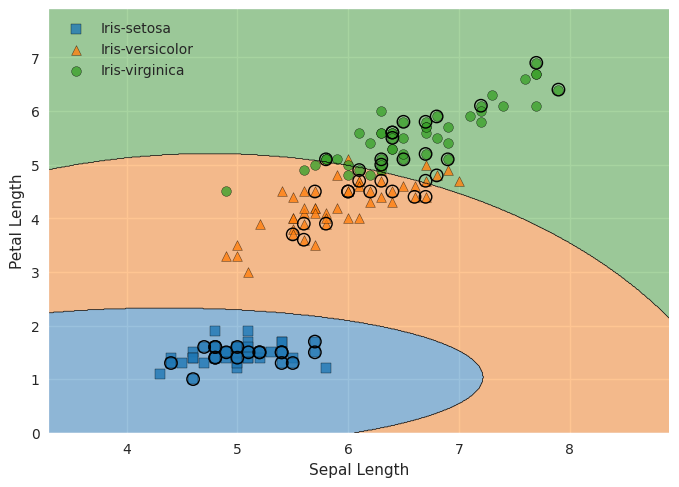

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Avg accuracy: ", gnb.score(X_test, y_test))
print("\nMean of the Gaussian Estimators:\n", gnb.theta_)
print("\nStd Dev of the Gaussian Estimators:\n", gnb.var_)

plot_decision_regions(df_X.values, df_y, clf=gnb, legend=2, X_highlight=X_test)
plt.xlabel(df_X.columns[0])
plt.ylabel(df_X.columns[1])
plt.legend(encoder.classes_)
plt.show() 

---
## Quadratic Discriminant Analysis (QDA)
- Used when the independence among variables cannot be assumed
- Assume that the observations within each class are drawn from a multivariate Gaussian distribution with per-class specific means and covariance matrix.
- Gaussian NB can be considered a special case of QDA when the covariance matrix is diagonal (i.e. all covariance values are equal to zero).

Avg accuracy:  0.98

QDA means per class:
 [[4.96451613 1.46774194]
 [5.85142857 4.22      ]
 [6.55294118 5.54411765]]

QDA covariance per class:
 [array([[0.11569892, 0.01648387],
       [0.01648387, 0.03425806]]), array([[0.27963025, 0.20070588],
       [0.20070588, 0.25164706]]), array([[0.45832442, 0.33365419],
       [0.33365419, 0.30799465]])]


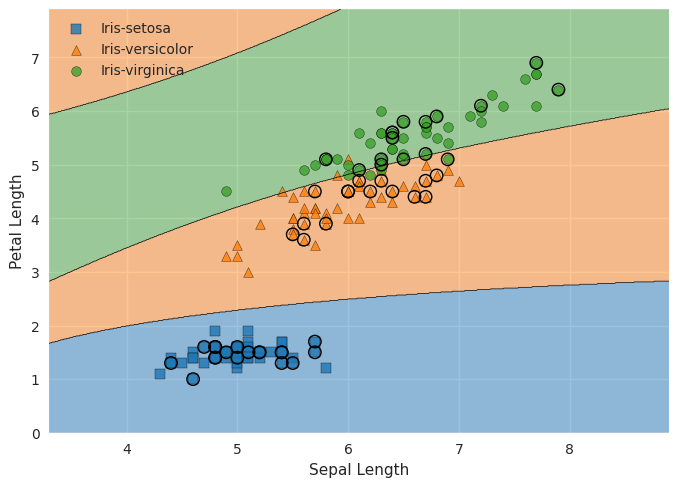

In [12]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train).predict(X_test)

print("Avg accuracy: ", qda.score(X_test, y_test))
print("\nQDA means per class:\n", qda.means_)
print("\nQDA covariance per class:\n", qda.covariance_)

plot_decision_regions(df_X.values, df_y, clf=qda, legend=2, X_highlight=X_test)
plt.xlabel(df_X.columns[0])
plt.ylabel(df_X.columns[1])
plt.legend(encoder.classes_)
plt.show()